In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars_evol=pd.read_csv("car_evaluation.csv")
cars_evol

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [3]:
cars_evol.columns=['Buying', 'Maintenance', 'Doors', 'Persons_Fit', 'Lug_Boot', 'Safety', 'Class']
cars_evol

,Buying,Maintenance,Doors,Persons_Fit,Lug_Boot,Safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
cars_evol.describe()

,Buying,Maintenance,Doors,Persons_Fit,Lug_Boot,Safety,Class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [5]:
cars_evol['Class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: Class, dtype: int64

In [6]:
cars_evol.isnull().sum()


Buying         0
Maintenance    0
Doors          0
Persons_Fit    0
Lug_Boot       0
Safety         0
Class          0
dtype: int64

In [7]:
x=cars_evol.drop(['Class'],axis=1)
y=cars_evol['Class']

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [9]:
import category_encoders as ce

In [10]:
encoder = ce.OrdinalEncoder(cols=['Buying', 'Maintenance', 'Doors', 'Persons_Fit', 'Lug_Boot', 'Safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [11]:
x_train.head()

,Buying,Maintenance,Doors,Persons_Fit,Lug_Boot,Safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [12]:
from sklearn.ensemble import RandomForestClassifier

# 5 decision-trees

In [13]:
rfc = RandomForestClassifier( n_estimators=5,random_state=0)

In [14]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [15]:
y_pred = rfc.predict(x_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [17]:
print("confusion_matrix")
print('------')
print(confusion_matrix(y_test,y_pred))

confusion_matrix
------
[[110   6  11   0]
 [  2  11   2   3]
 [  8   0 391   0]
 [  5   4   1  16]]


In [18]:
print("classification_report")
print('------')
print(classification_report(y_test,y_pred))

classification_report
------
              precision    recall  f1-score   support

         acc       0.88      0.87      0.87       127
        good       0.52      0.61      0.56        18
       unacc       0.97      0.98      0.97       399
       vgood       0.84      0.62      0.71        26

    accuracy                           0.93       570
   macro avg       0.80      0.77      0.78       570
weighted avg       0.93      0.93      0.93       570



In [19]:
print("accuracy score")
print('------')
print(accuracy_score(y_test,y_pred)*100)

accuracy score
------
92.63157894736842


# 100 decision-trees

In [20]:
rfc1 = RandomForestClassifier( n_estimators=100,random_state=10)
rfc1.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

In [21]:
y_pred = rfc1.predict(x_test)

In [22]:
print("confusion_matrix")
print('------')
print(confusion_matrix(y_test,y_pred))

confusion_matrix
------
[[117   3   6   1]
 [  2  12   3   1]
 [  2   0 397   0]
 [  5   0   0  21]]


In [23]:
print("classification_report")
print('------')
print(classification_report(y_test,y_pred))

classification_report
------
              precision    recall  f1-score   support

         acc       0.93      0.92      0.92       127
        good       0.80      0.67      0.73        18
       unacc       0.98      0.99      0.99       399
       vgood       0.91      0.81      0.86        26

    accuracy                           0.96       570
   macro avg       0.90      0.85      0.87       570
weighted avg       0.96      0.96      0.96       570



In [24]:
print("accuracy score")
print('------')
print(accuracy_score(y_test,y_pred)*100)

accuracy score
------
95.96491228070175


# The accuracy of the model with doors variable removed

In [25]:
x1=cars_evol.drop(['Class','Doors'],axis=1)
y1=cars_evol['Class']

In [26]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.30, random_state = 40)

In [27]:
encoder = ce.OrdinalEncoder(cols=['Buying', 'Maintenance','Persons_Fit', 'Lug_Boot', 'Safety'])
x1_train = encoder.fit_transform(x1_train)
x1_test = encoder.transform(x1_test)

In [28]:
x1_train.head()

,Buying,Maintenance,Persons_Fit,Lug_Boot,Safety
1302,1,1,1,1,1
1647,1,2,1,2,1
498,2,1,2,3,1
739,2,3,2,2,2
899,3,1,2,2,3


In [29]:
rfc = RandomForestClassifier( n_estimators=5,random_state=0)

In [30]:
rfc.fit(x1_train, y1_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [31]:
y1_pred = rfc.predict(x1_test)

In [32]:
print("confusion_matrix")
print('------')
print(confusion_matrix(y1_test,y1_pred))

confusion_matrix
------
[[101   4   5   0]
 [  1  15   0   2]
 [ 13   1 361   0]
 [  2   2   0  12]]


In [33]:
print("classification_report")
print('------')
print(classification_report(y1_test,y1_pred))

classification_report
------
              precision    recall  f1-score   support

         acc       0.86      0.92      0.89       110
        good       0.68      0.83      0.75        18
       unacc       0.99      0.96      0.97       375
       vgood       0.86      0.75      0.80        16

    accuracy                           0.94       519
   macro avg       0.85      0.87      0.85       519
weighted avg       0.95      0.94      0.94       519



In [34]:
print("accuracy score")
print('------')
print(accuracy_score(y1_test,y1_pred)*100)

accuracy score
------
94.21965317919076


# The accuracy of the model with lug_boot variable removed

In [35]:
x2=cars_evol.drop(['Class','Lug_Boot'],axis=1)
y2=cars_evol['Class']

In [36]:
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.30, random_state = 40)

In [37]:
encoder = ce.OrdinalEncoder(cols=['Buying', 'Maintenance','Persons_Fit', 'Doors', 'Safety'])
x2_train = encoder.fit_transform(x2_train)
x2_test = encoder.transform(x2_test)

In [38]:
x2_train.head()

,Buying,Maintenance,Doors,Persons_Fit,Safety
1302,1,1,1,1,1
1647,1,2,2,1,1
498,2,1,3,2,1
739,2,3,4,2,2
899,3,1,2,2,3


In [39]:
rfc2 = RandomForestClassifier( n_estimators=5,random_state=0)

In [40]:
rfc2.fit(x2_train, y2_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [41]:
y2_pred = rfc.predict(x2_test)

In [42]:
print("confusion_matrix")
print('------')
print(confusion_matrix(y2_test,y2_pred))

confusion_matrix
------
[[ 72   1  36   1]
 [  4   8   5   1]
 [ 47   9 303  16]
 [  6   4   1   5]]


In [43]:
print("classification_report")
print('------')
print(classification_report(y2_test,y2_pred))

classification_report
------
              precision    recall  f1-score   support

         acc       0.56      0.65      0.60       110
        good       0.36      0.44      0.40        18
       unacc       0.88      0.81      0.84       375
       vgood       0.22      0.31      0.26        16

    accuracy                           0.75       519
   macro avg       0.50      0.55      0.53       519
weighted avg       0.77      0.75      0.76       519



In [44]:
print("accuracy score")
print('------')
print(accuracy_score(y2_test,y2_pred)*100)

accuracy score
------
74.75915221579962


# RESULT
1.In this project, I build a Random Forest Classifier to predict the safety of the car. I build two models, one with 5 decision-trees and another one with 100 decision-trees.

2.The model accuracy score with 5 decision-trees is 0.9263 but the same with 100 decision-trees is 0.9596. So, as expected accuracy increases with number of decision-trees in the model.

3.I have used the Random Forest model to find only the important features, build the model using these features and see its effect on accuracy. The most important feature is safety and least important feature is doors.

4.I have removed the doors variable from the model, rebuild it and checked its accuracy. The accuracy of the model with doors variable removed is 0.9421. The accuracy of the model with all the variables taken into account is 0.9263. So, we can see that the model accuracy has been improved with doors variable removed from the model.

5.The second least important model is lug_boot. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.7475. It is a significant drop in the accuracy. So, I will not drop it from the model.
Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance.

# VISUALISATION BY DECISION TREE

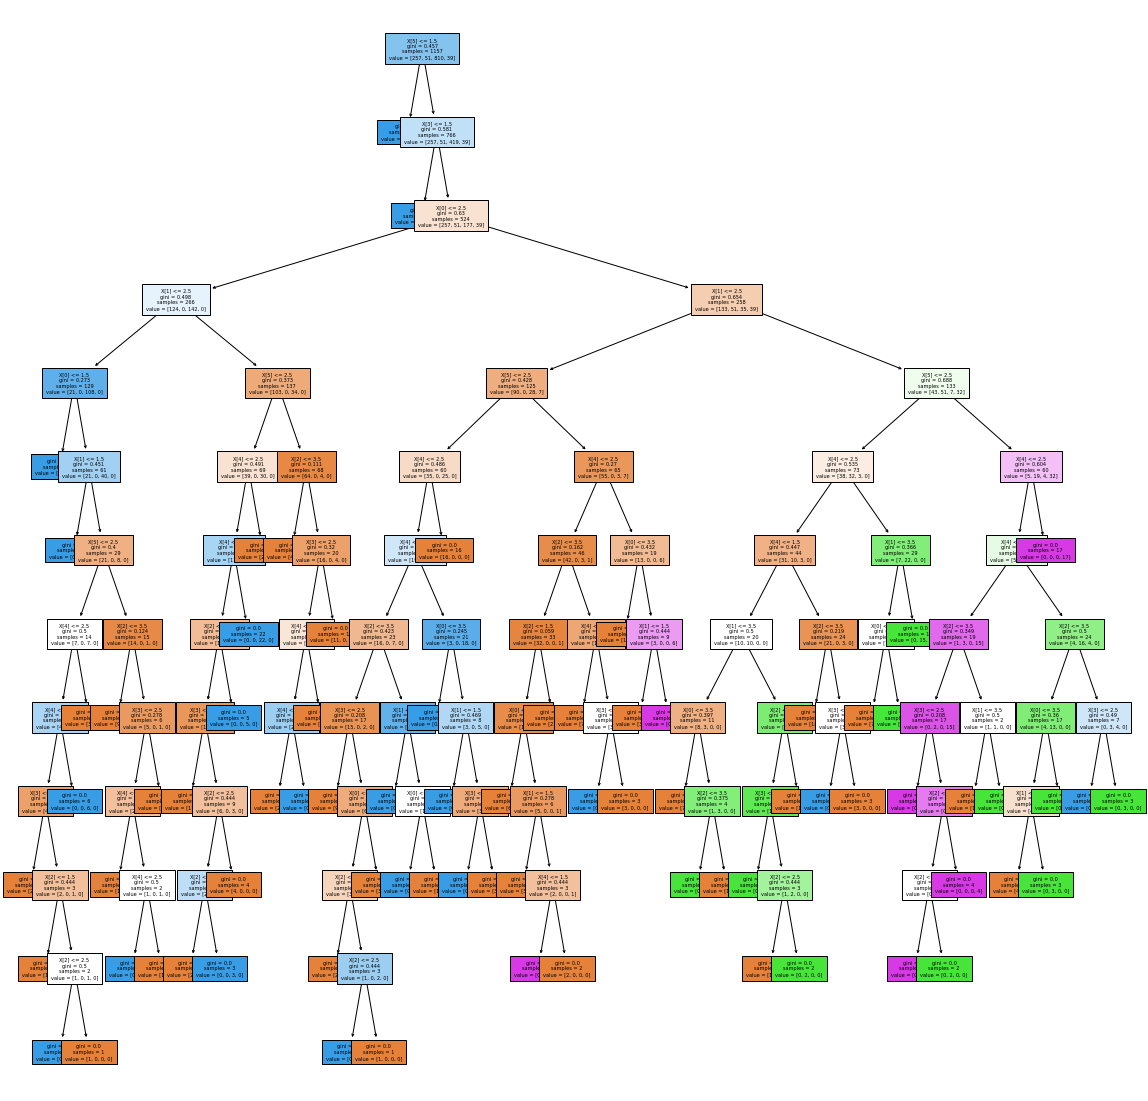

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
clf=DecisionTreeClassifier().fit(x_train,y_train)
plot_tree(clf,filled=True,fontsize=5)
plt.show()

# VISUALISATION BY RANDOM FOREST

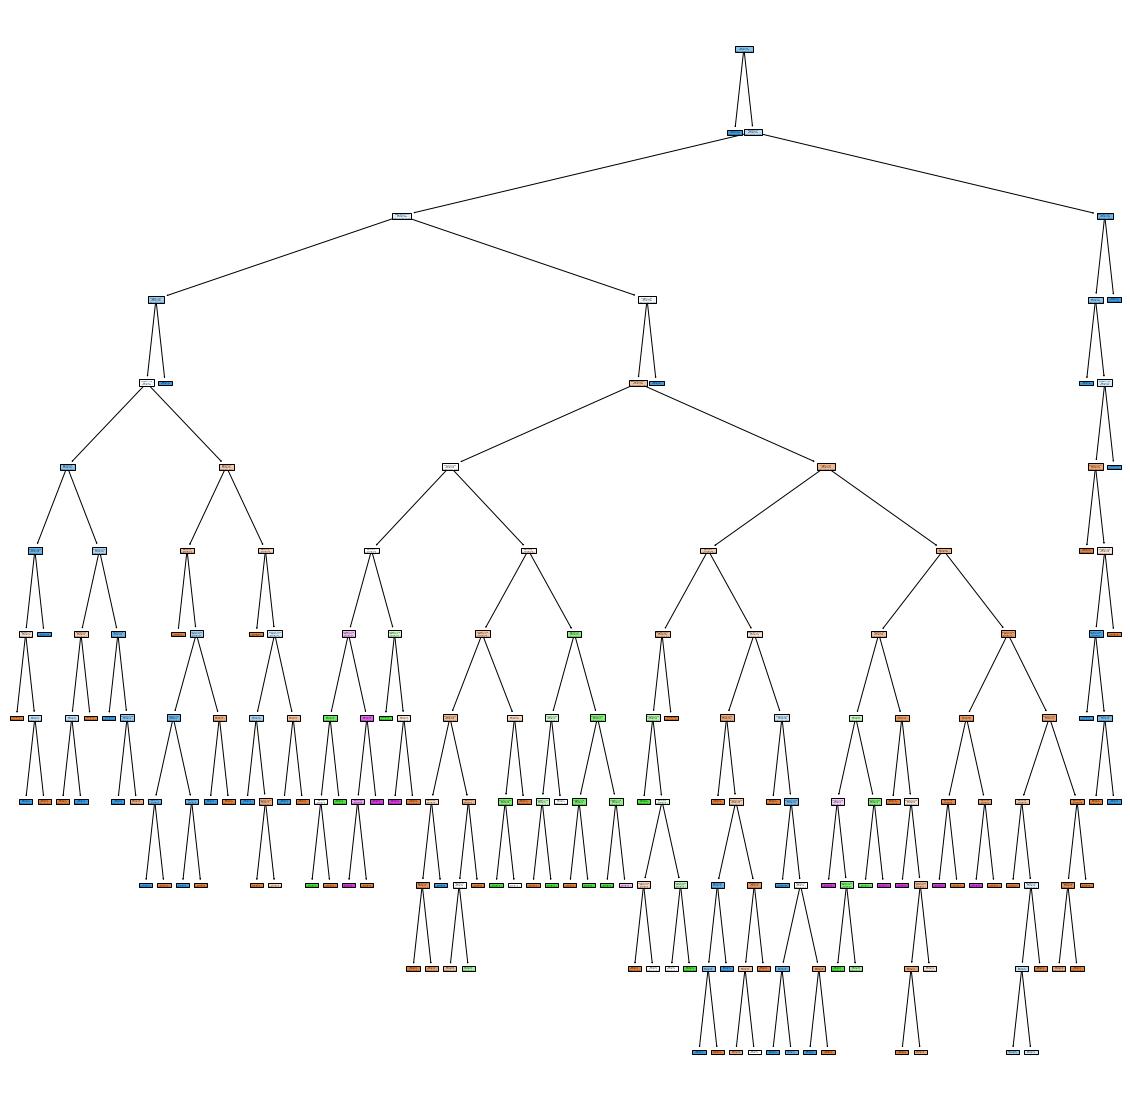

In [46]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
ax= plot_tree(rfc.estimators_[0], feature_names=x.columns, filled=True)

# VISUALISATION BY RANDOM FOREST

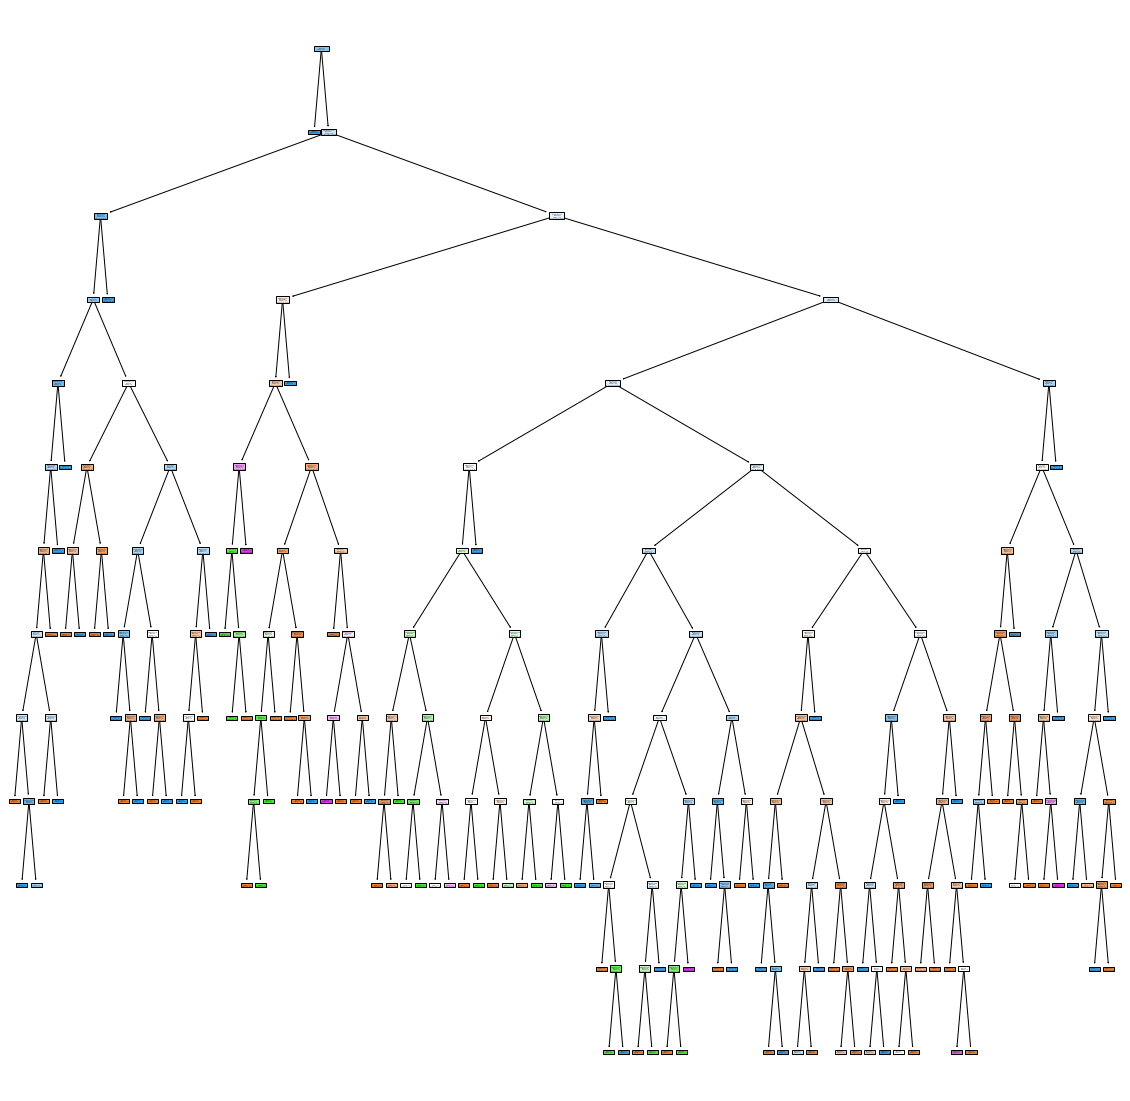

In [47]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
ax= plot_tree(rfc.estimators_[1], feature_names=x.columns, filled=True)

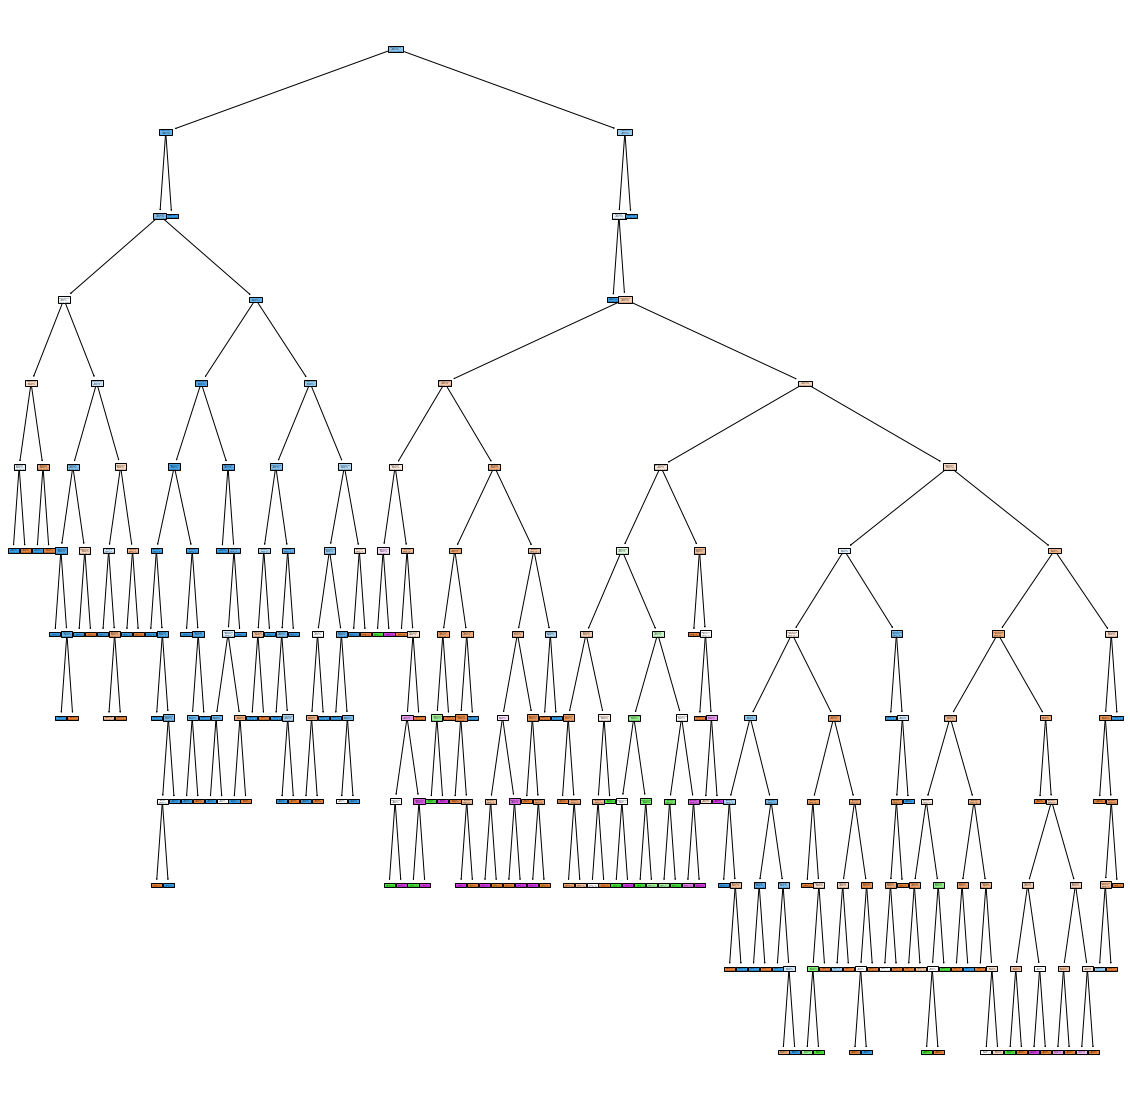

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
ax= plot_tree(rfc.estimators_[2], feature_names=x.columns, filled=True)